<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/CoolCharts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install matplotlib seaborn

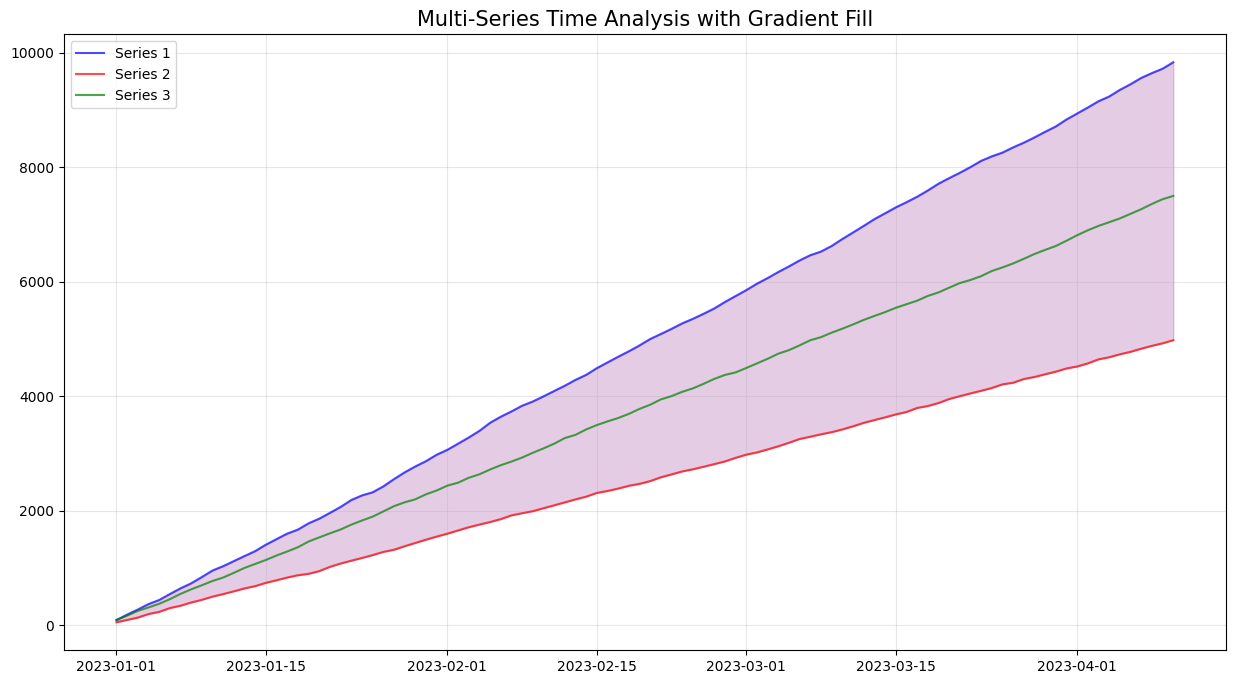

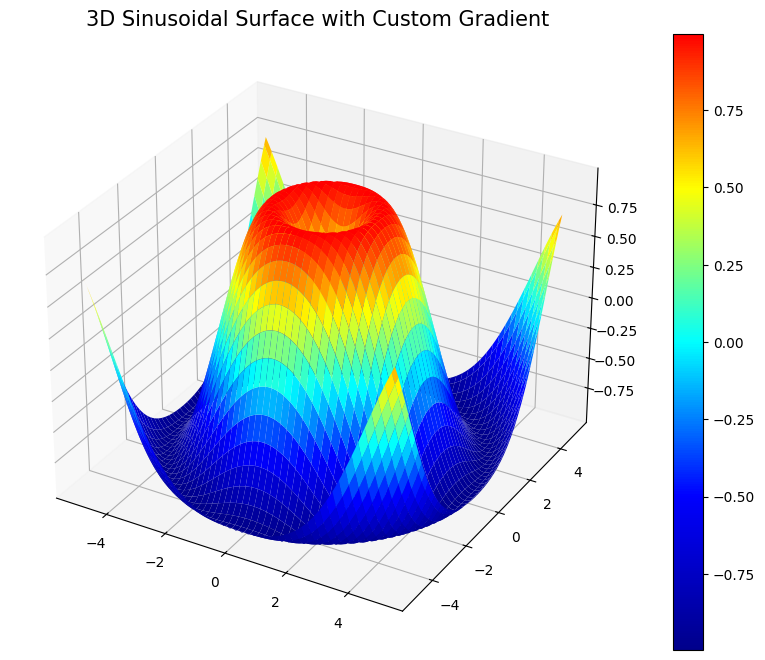

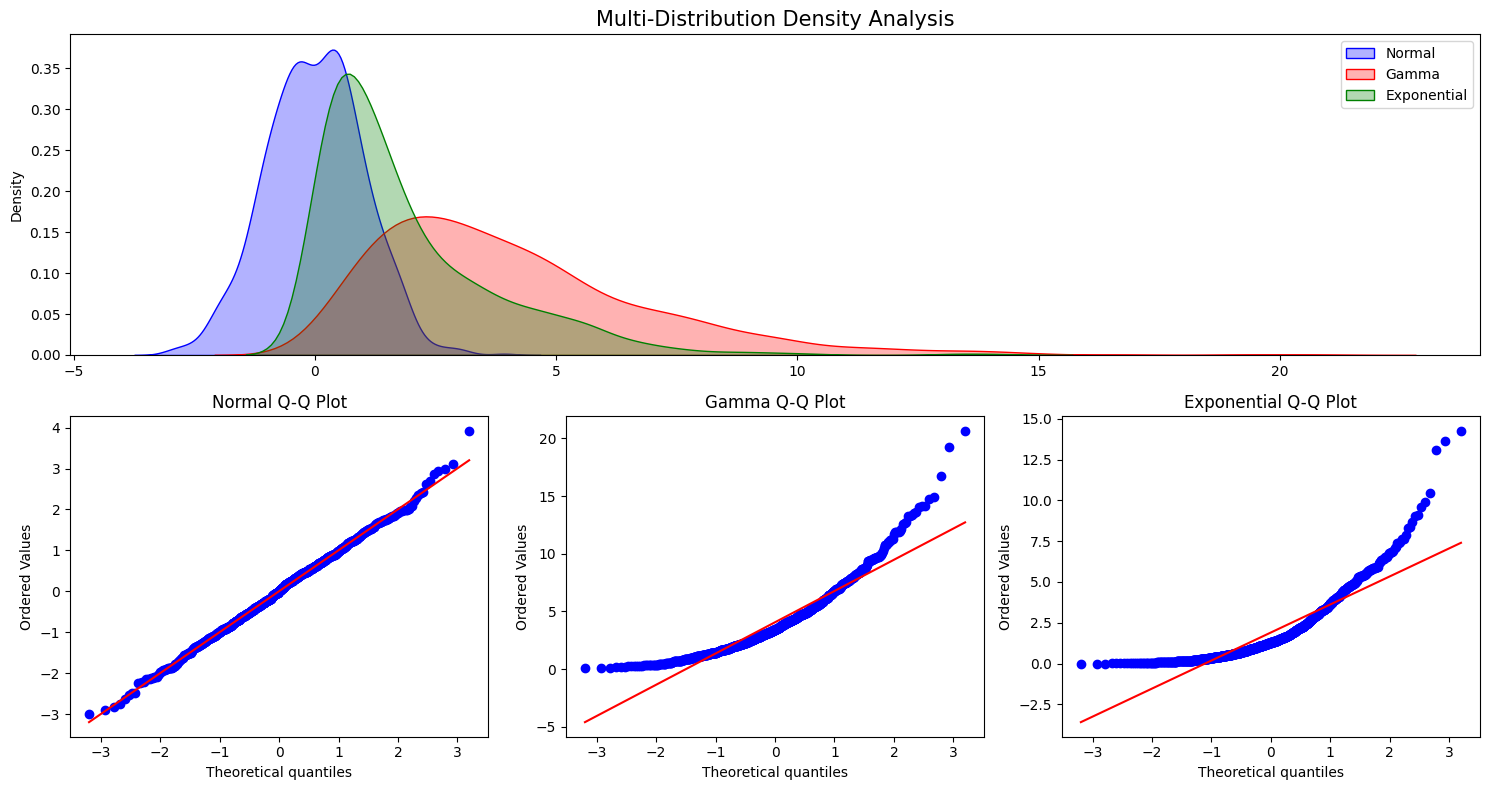

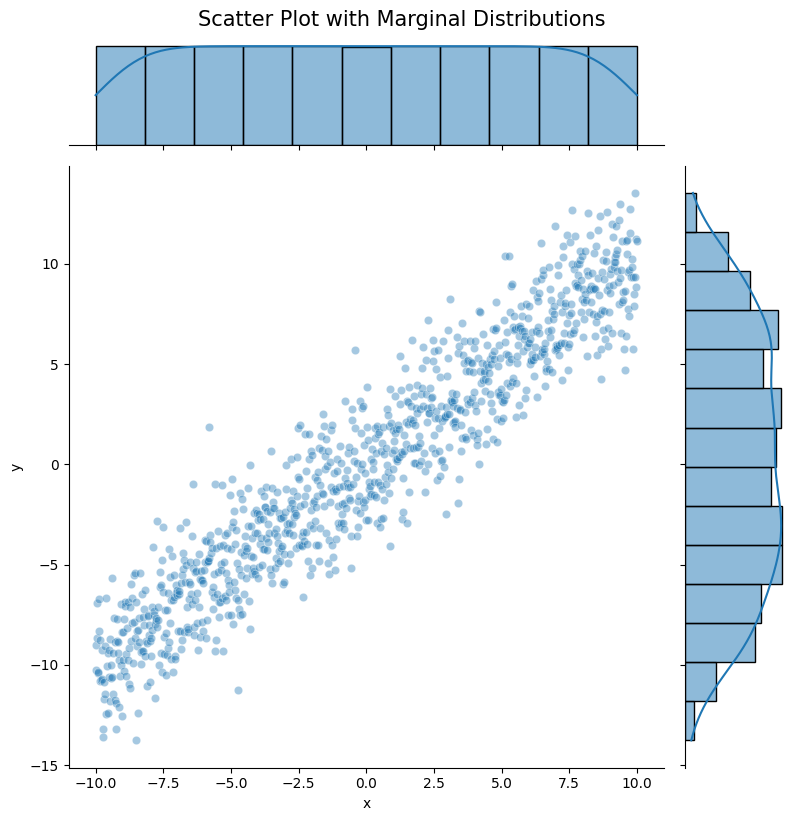

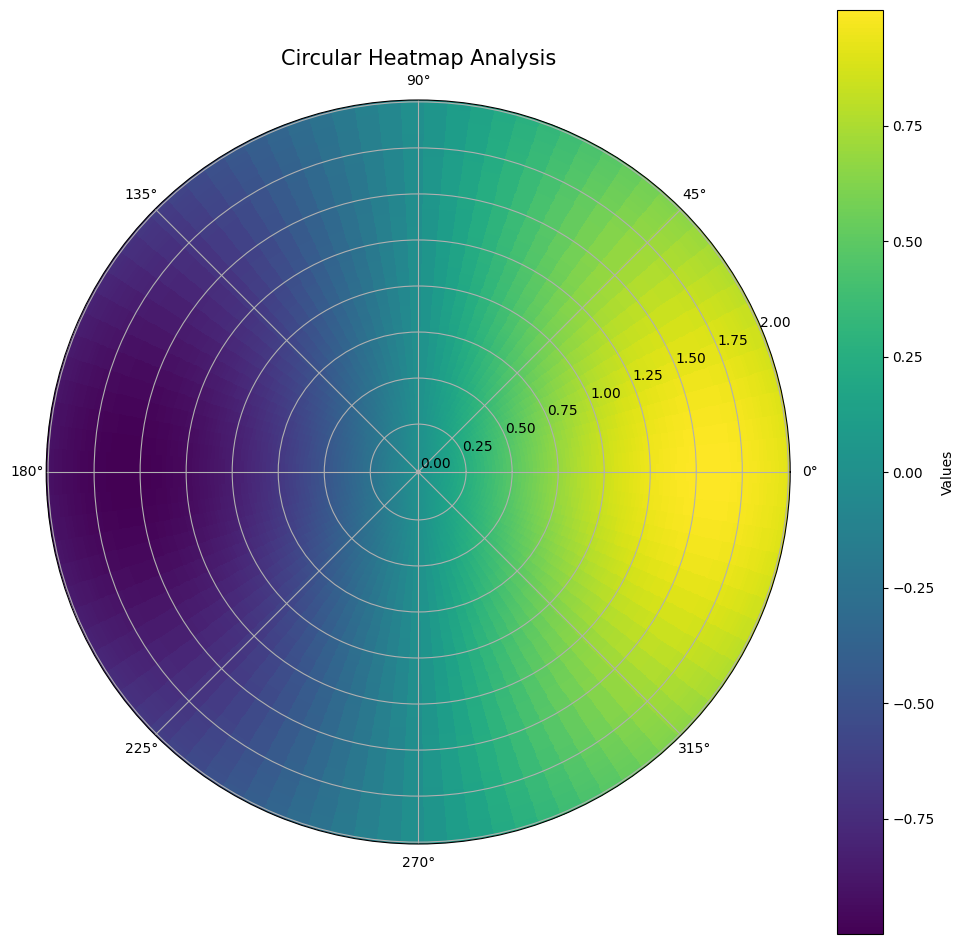

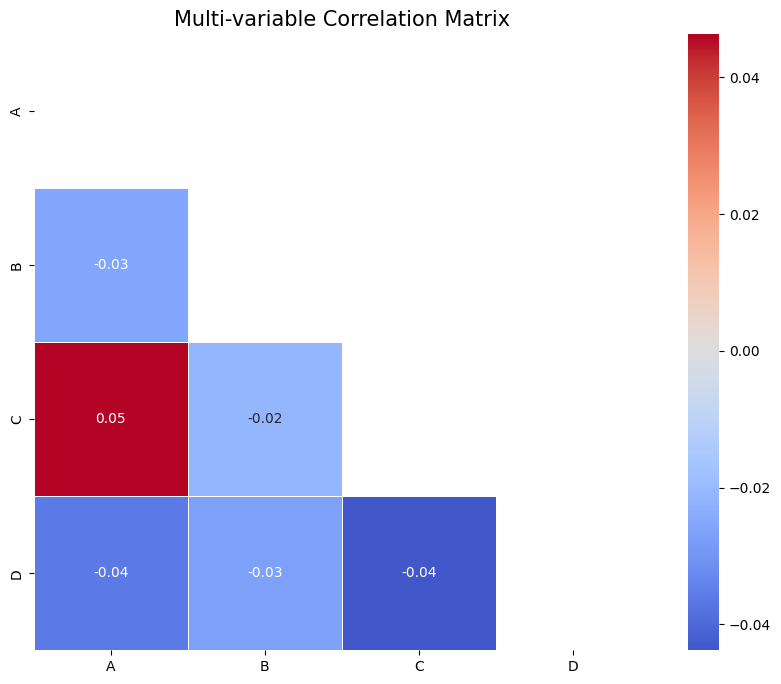

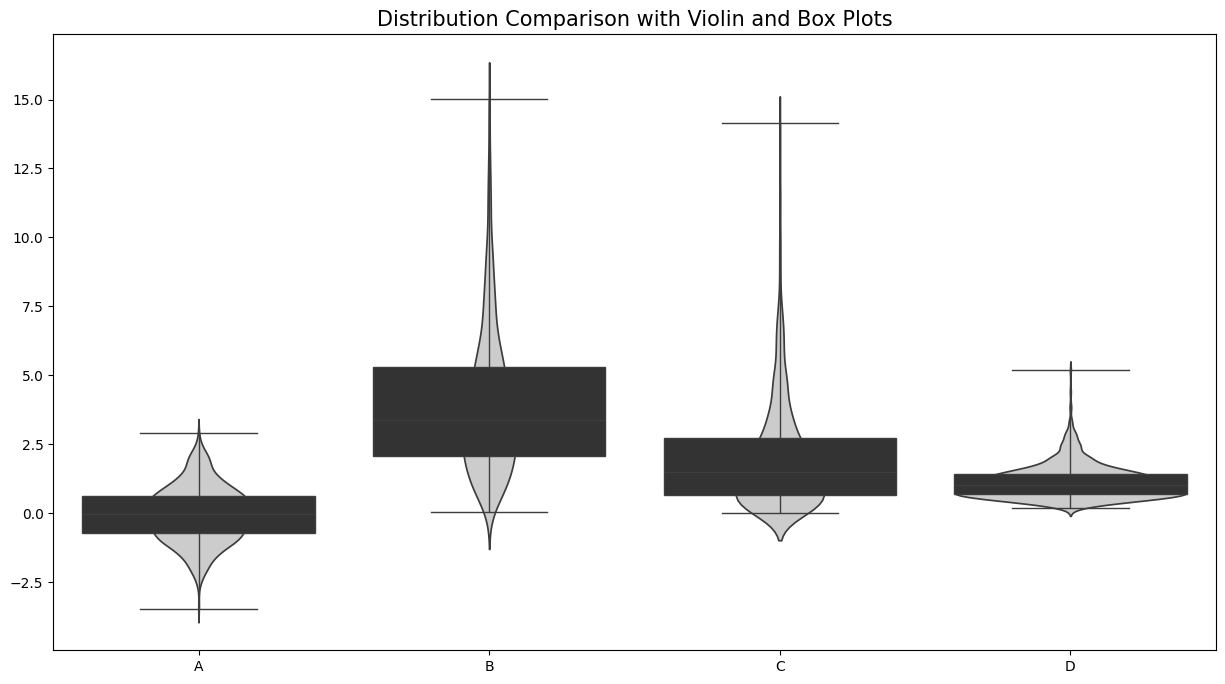

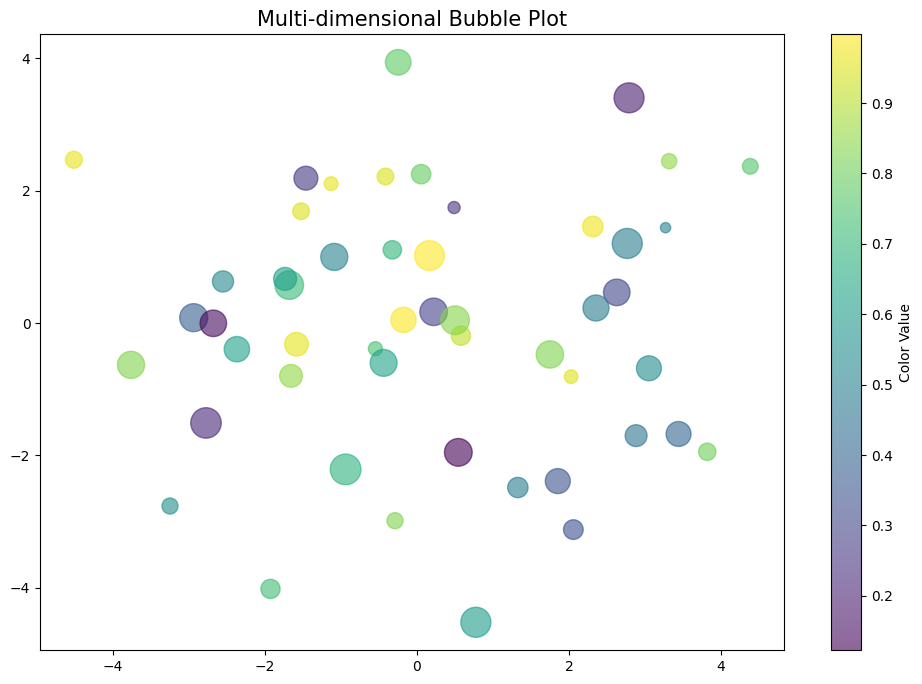

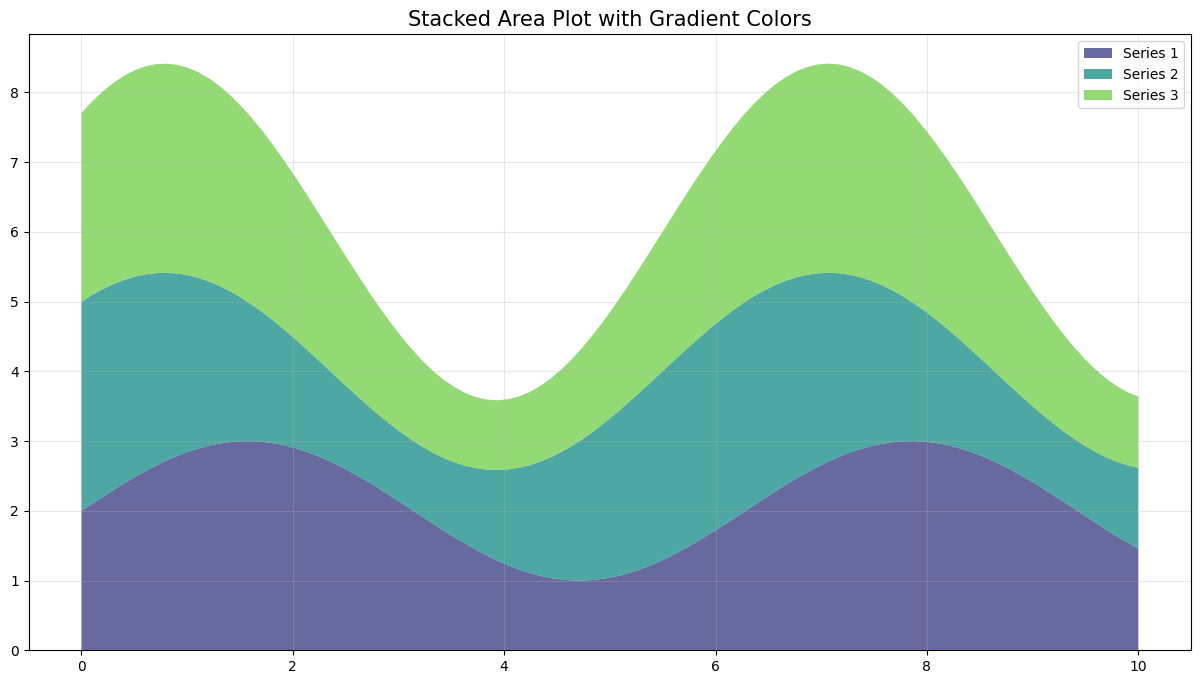

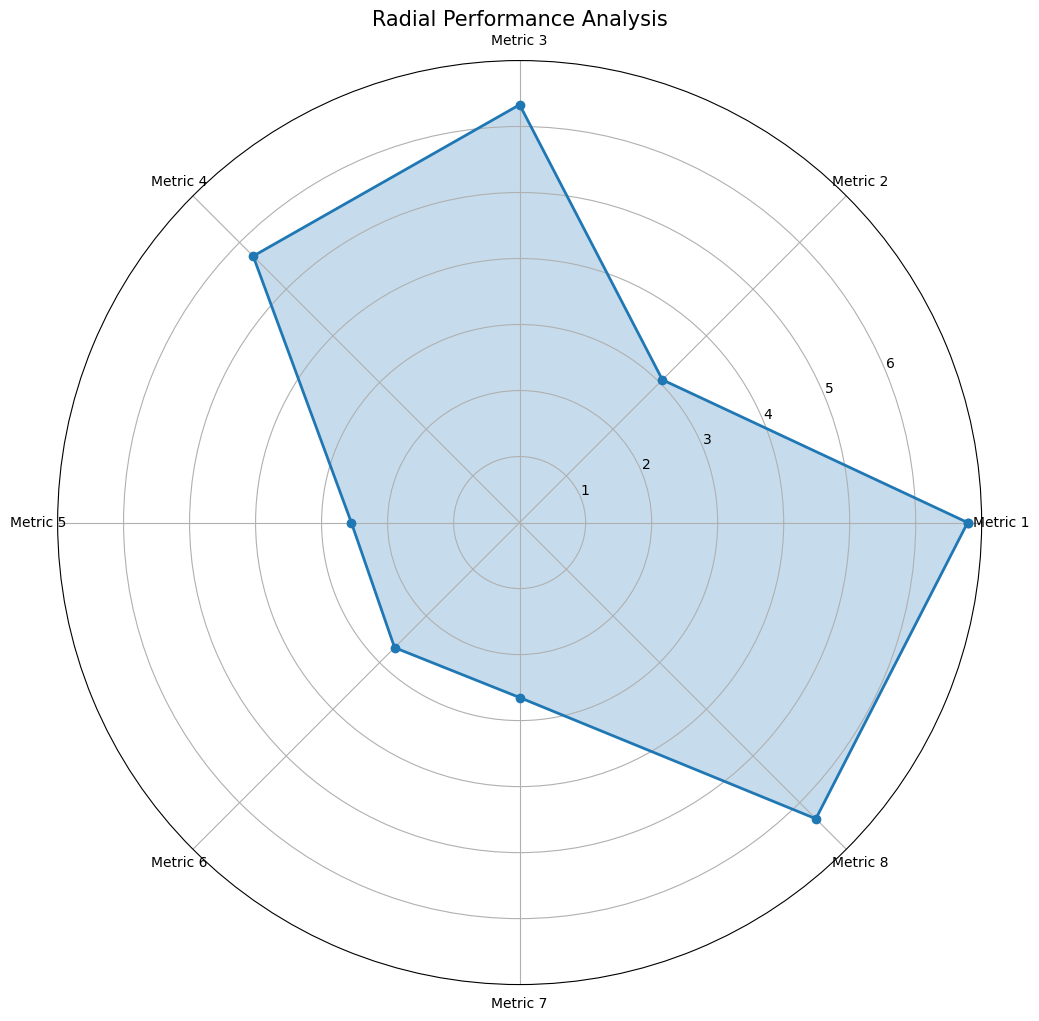

Visualizations generated! Each plot demonstrates different advanced techniques:
1. Multi-series time analysis with gradient fill
2. 3D surface plot with custom gradient
3. Statistical distribution analysis with QQ plots
4. Scatter plot with marginal distributions
5. Circular heatmap
6. Multi-variable correlation matrix
7. Advanced box plot with violin overlay
8. Multi-dimensional bubble plot
9. Stacked area plot with gradient
10. Radial performance analysis


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
from scipy import stats
import matplotlib.patches as patches

# Set style and random seed
#plt.style.use('seaborn')
np.random.seed(42)

# Generate sample data
n_samples = 1000
dates = pd.date_range('2023-01-01', periods=100)
x = np.linspace(-10, 10, n_samples)
y = x + np.random.normal(0, 2, n_samples)
z = x**2 + y**2 + np.random.normal(0, 20, n_samples)

# Create sample timeseries
ts_data = pd.DataFrame({
    'date': dates,
    'value1': np.random.normal(100, 15, 100).cumsum(),
    'value2': np.random.normal(50, 10, 100).cumsum(),
    'value3': np.random.normal(75, 12, 100).cumsum()
})

# 1. Complex Time Series with Multiple Features
plt.figure(figsize=(15, 8))
plt.plot(ts_data.date, ts_data.value1, 'b-', alpha=0.7, label='Series 1')
plt.plot(ts_data.date, ts_data.value2, 'r-', alpha=0.7, label='Series 2')
plt.plot(ts_data.date, ts_data.value3, 'g-', alpha=0.7, label='Series 3')
plt.fill_between(ts_data.date, ts_data.value1, ts_data.value2, alpha=0.2, color='purple')
plt.title('Multi-Series Time Analysis with Gradient Fill', fontsize=15)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# 2. Advanced 3D Surface Plot with Gradient
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

custom_cmap = LinearSegmentedColormap.from_list("", ["darkblue","blue","cyan","yellow","red"])
surf = ax.plot_surface(X, Y, Z, cmap=custom_cmap, linewidth=0, antialiased=True)
ax.set_title('3D Sinusoidal Surface with Custom Gradient', fontsize=15)
plt.colorbar(surf)
plt.show()

# 3. Advanced Statistical Distribution Analysis
plt.figure(figsize=(15, 8))
gs = GridSpec(2, 3)

# Generate multiple distributions
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.gamma(2, 2, 1000)
data3 = np.random.exponential(2, 1000)

# Main distribution plot
ax0 = plt.subplot(gs[0, :])
sns.kdeplot(data=data1, label='Normal', color='blue', fill=True, alpha=0.3)
sns.kdeplot(data=data2, label='Gamma', color='red', fill=True, alpha=0.3)
sns.kdeplot(data=data3, label='Exponential', color='green', fill=True, alpha=0.3)
ax0.set_title('Multi-Distribution Density Analysis', fontsize=15)
ax0.legend()

# QQ plots
ax1 = plt.subplot(gs[1, 0])
stats.probplot(data1, dist="norm", plot=ax1)
ax1.set_title('Normal Q-Q Plot')

ax2 = plt.subplot(gs[1, 1])
stats.probplot(data2, dist="norm", plot=ax2)
ax2.set_title('Gamma Q-Q Plot')

ax3 = plt.subplot(gs[1, 2])
stats.probplot(data3, dist="norm", plot=ax3)
ax3.set_title('Exponential Q-Q Plot')

plt.tight_layout()
plt.show()

# 4. Advanced Scatter Plot with Marginal Distributions
g = sns.JointGrid(data=pd.DataFrame({'x': x, 'y': y}), x='x', y='y', height=8)
g.plot_joint(sns.scatterplot, alpha=0.4)
g.plot_marginals(sns.histplot, kde=True)
g.fig.suptitle('Scatter Plot with Marginal Distributions', y=1.02, fontsize=15)
plt.show()

# 5. Circular Heatmap
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='polar')
r = np.linspace(0, 2, 100)
theta = np.linspace(0, 2*np.pi, 100)
r, theta = np.meshgrid(r, theta)
values = np.cos(theta) * np.sin(r)
plt.pcolormesh(theta, r, values, cmap='viridis')
plt.title('Circular Heatmap Analysis', fontsize=15)
plt.colorbar(label='Values')
plt.show()

# 6. Multi-variable Correlation Analysis
data = pd.DataFrame({
    'A': np.random.normal(0, 1, 1000),
    'B': np.random.normal(0, 2, 1000),
    'C': np.random.normal(1, 1.5, 1000),
    'D': np.random.normal(-1, 1, 1000)
})
corr = data.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f')
plt.title('Multi-variable Correlation Matrix', fontsize=15)
plt.show()

# 7. Advanced Box Plot with Violin Overlay
plt.figure(figsize=(15, 8))
data_dict = {
    'A': np.random.normal(0, 1, 1000),
    'B': np.random.gamma(2, 2, 1000),
    'C': np.random.exponential(2, 1000),
    'D': np.random.lognormal(0, 0.5, 1000)
}
df = pd.DataFrame(data_dict)

sns.violinplot(data=df, inner=None, color="0.8")
sns.boxplot(data=df, whis=np.inf, color="0.2")
plt.title('Distribution Comparison with Violin and Box Plots', fontsize=15)
plt.show()

# 8. Bubble Plot with Size and Color Encoding
plt.figure(figsize=(12, 8))
n = 50
x = np.random.normal(0, 2, n)
y = np.random.normal(0, 2, n)
size = np.random.uniform(50, 500, n)
colors = np.random.uniform(0, 1, n)

plt.scatter(x, y, s=size, c=colors, alpha=0.6, cmap='viridis')
plt.colorbar(label='Color Value')
plt.title('Multi-dimensional Bubble Plot', fontsize=15)
plt.show()

# 9. Stacked Area Plot with Gradient
plt.figure(figsize=(15, 8))
x = np.linspace(0, 10, 100)
y1 = np.sin(x) + 2
y2 = np.cos(x) + 2
y3 = np.sin(x + np.pi/4) + 2

plt.stackplot(x, [y1, y2, y3],
             labels=['Series 1', 'Series 2', 'Series 3'],
             alpha=0.8,
             colors=plt.cm.viridis([0.2, 0.5, 0.8]))
plt.title('Stacked Area Plot with Gradient Colors', fontsize=15)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

# 10. Radial Plot with Multiple Metrics
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='polar')
angles = np.linspace(0, 2*np.pi, 8, endpoint=False)
metrics = np.random.uniform(2, 8, 8)
metrics = np.concatenate((metrics, [metrics[0]]))  # complete the loop
angles = np.concatenate((angles, [angles[0]]))  # complete the loop

ax.plot(angles, metrics, 'o-', linewidth=2, label='Metrics')
ax.fill(angles, metrics, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(['Metric ' + str(i+1) for i in range(8)])
plt.title('Radial Performance Analysis', fontsize=15)
plt.show()

print("Visualizations generated! Each plot demonstrates different advanced techniques:")
print("1. Multi-series time analysis with gradient fill")
print("2. 3D surface plot with custom gradient")
print("3. Statistical distribution analysis with QQ plots")
print("4. Scatter plot with marginal distributions")
print("5. Circular heatmap")
print("6. Multi-variable correlation matrix")
print("7. Advanced box plot with violin overlay")
print("8. Multi-dimensional bubble plot")
print("9. Stacked area plot with gradient")
print("10. Radial performance analysis")

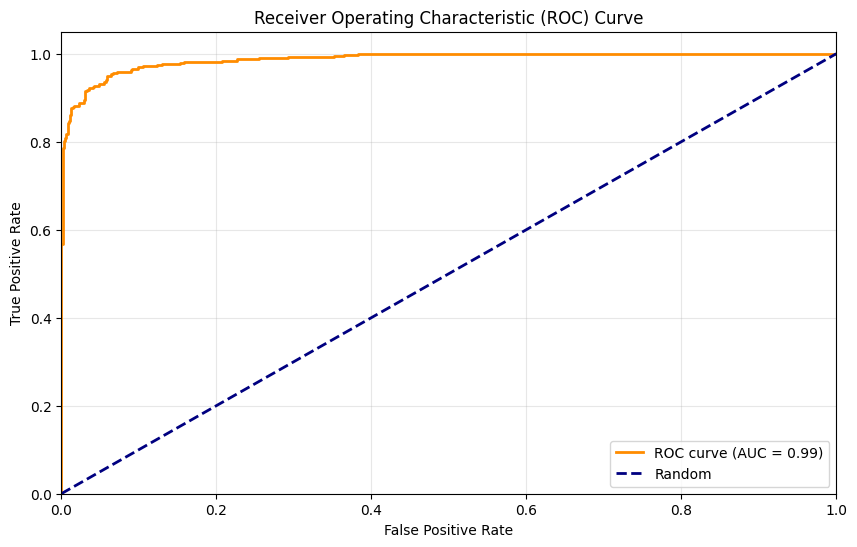

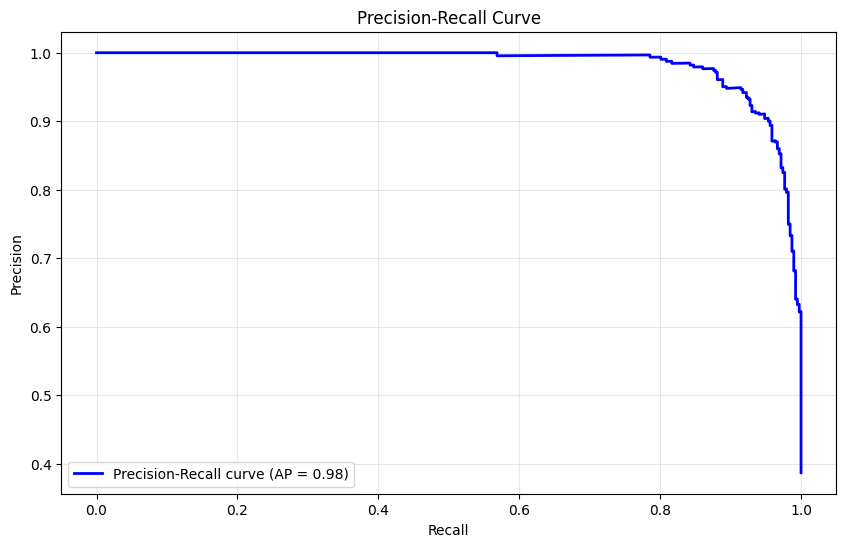

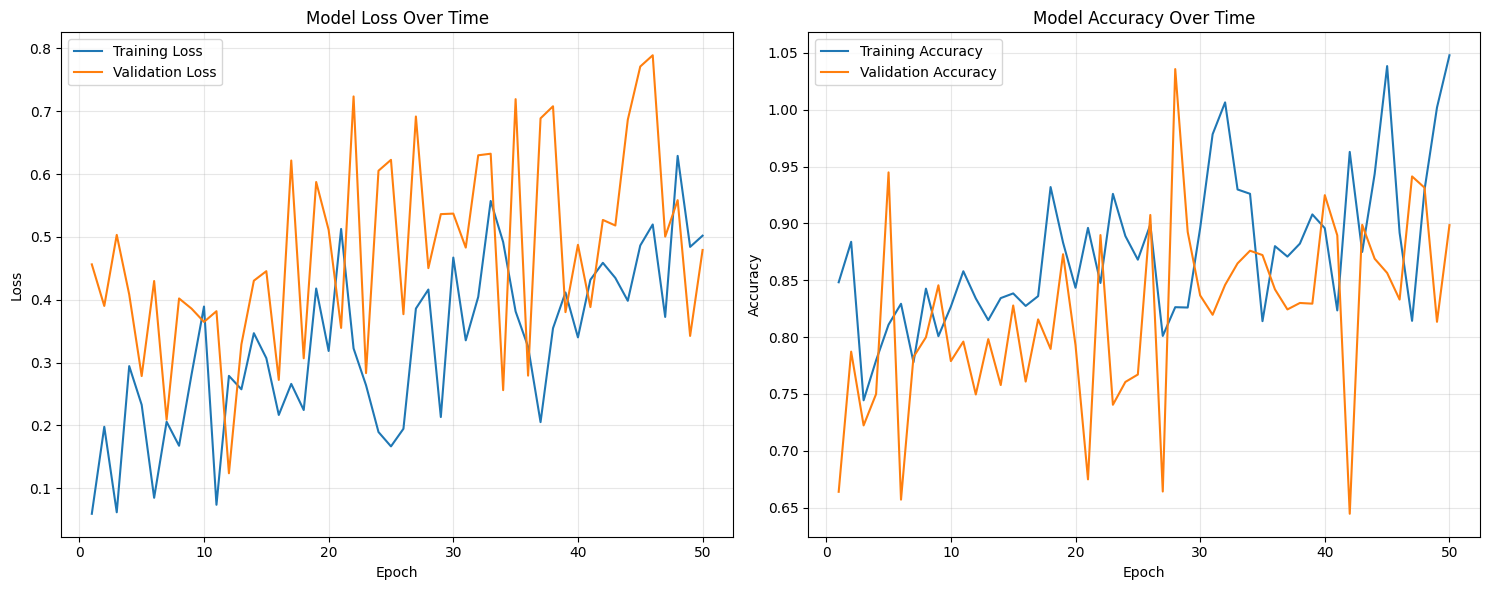

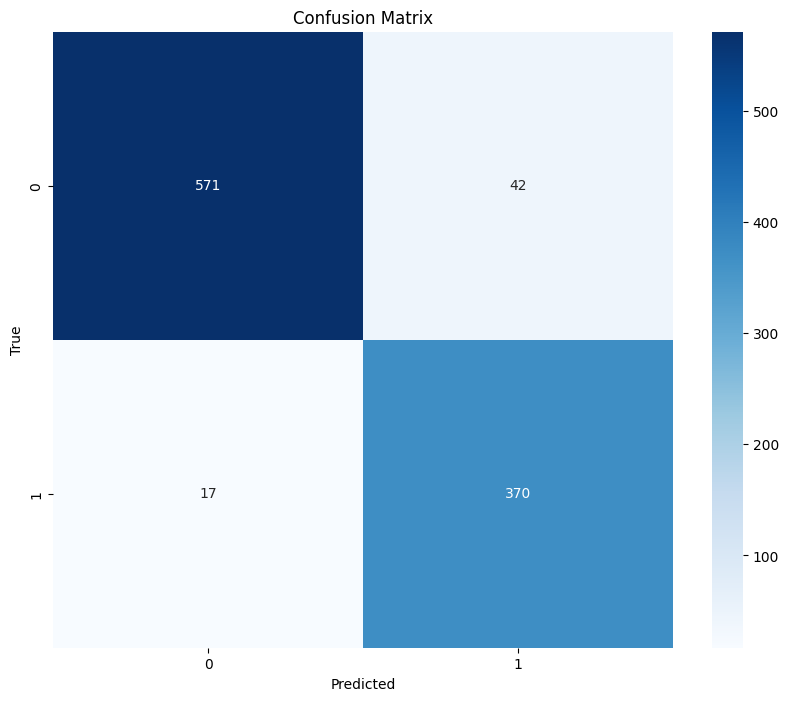

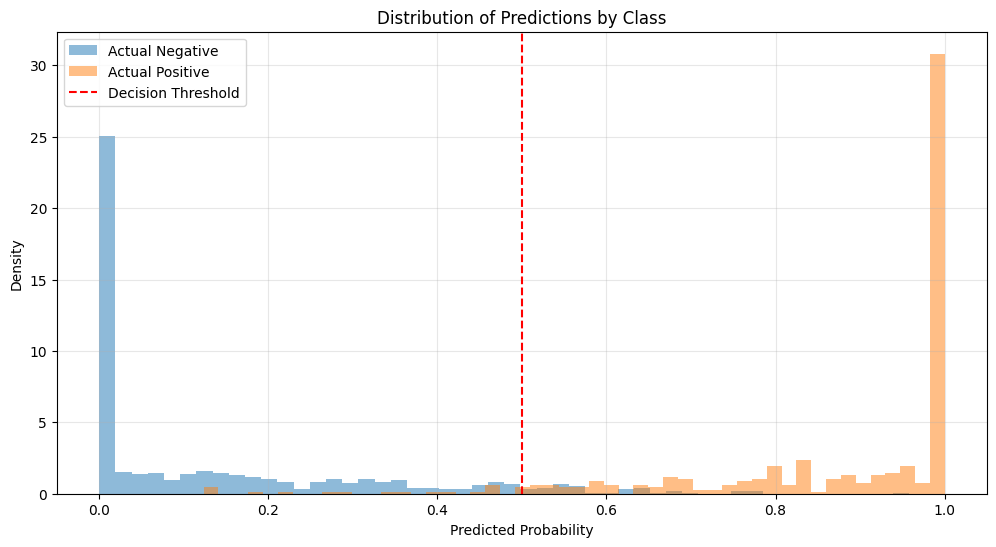

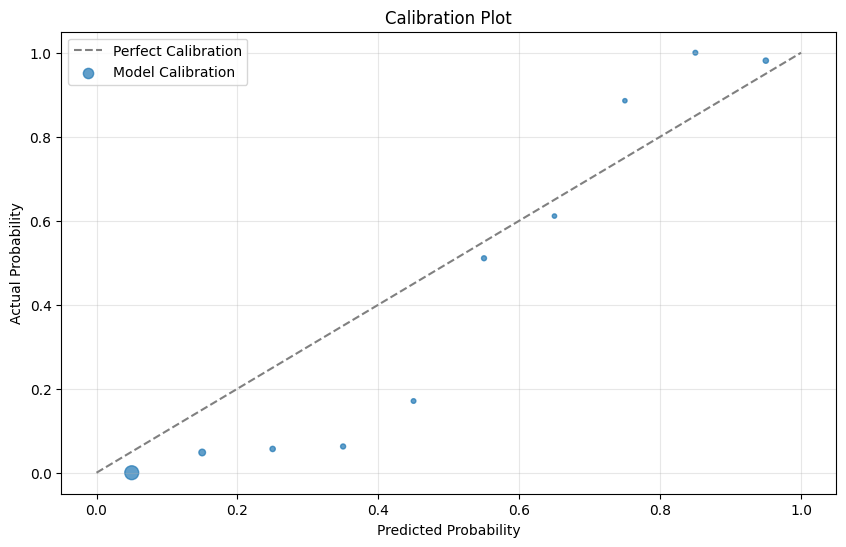

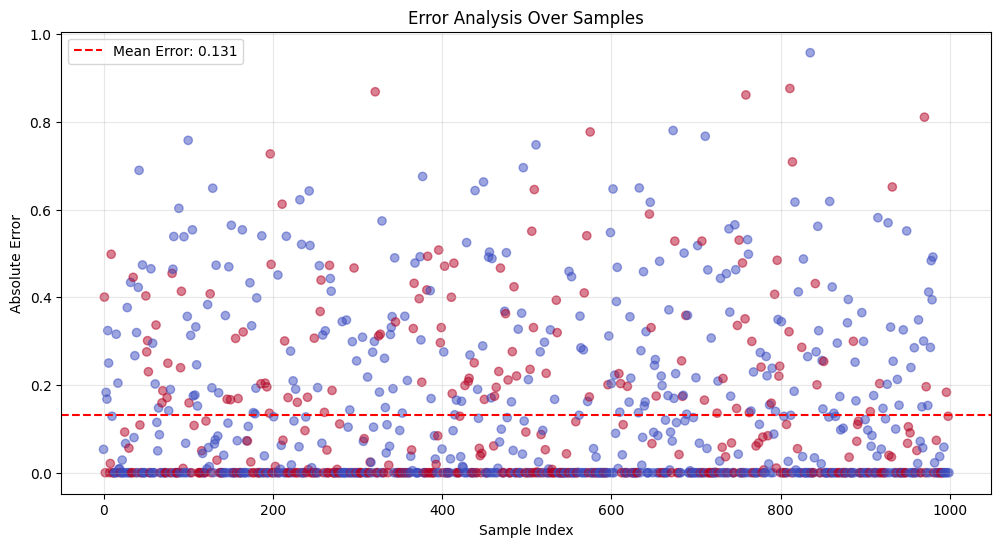

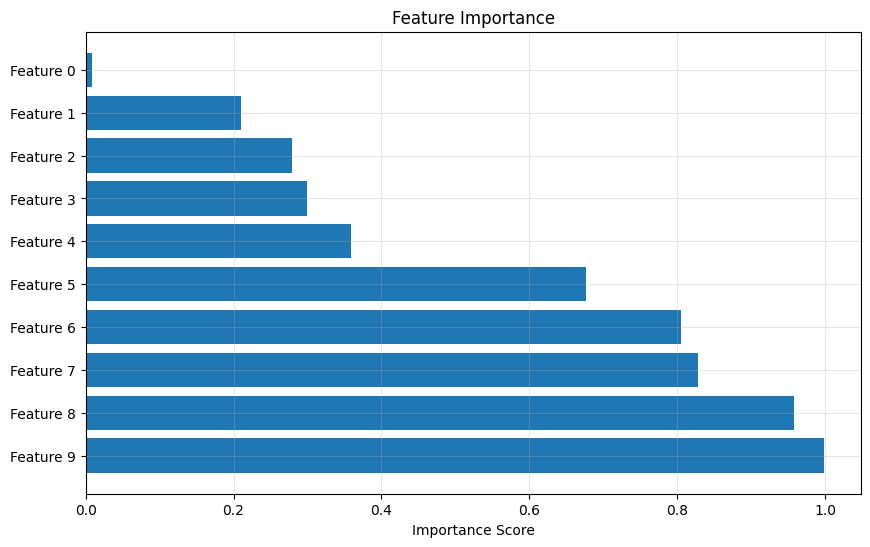

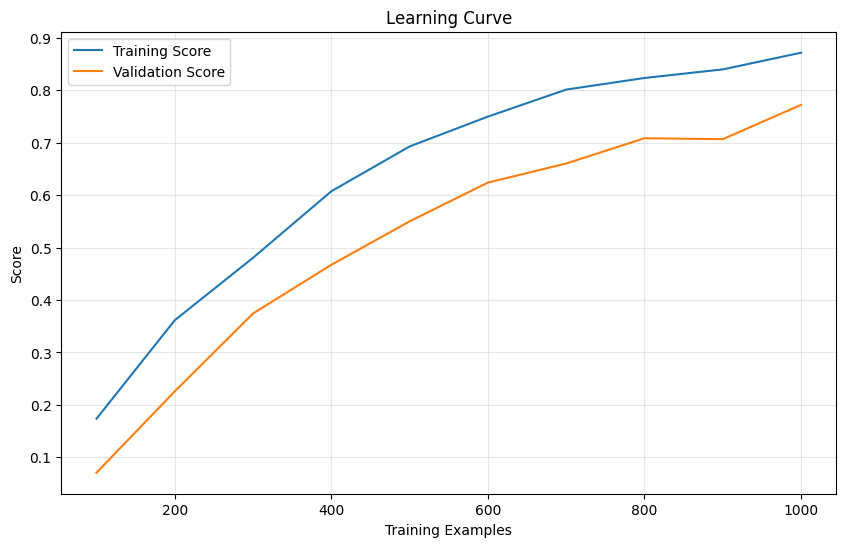

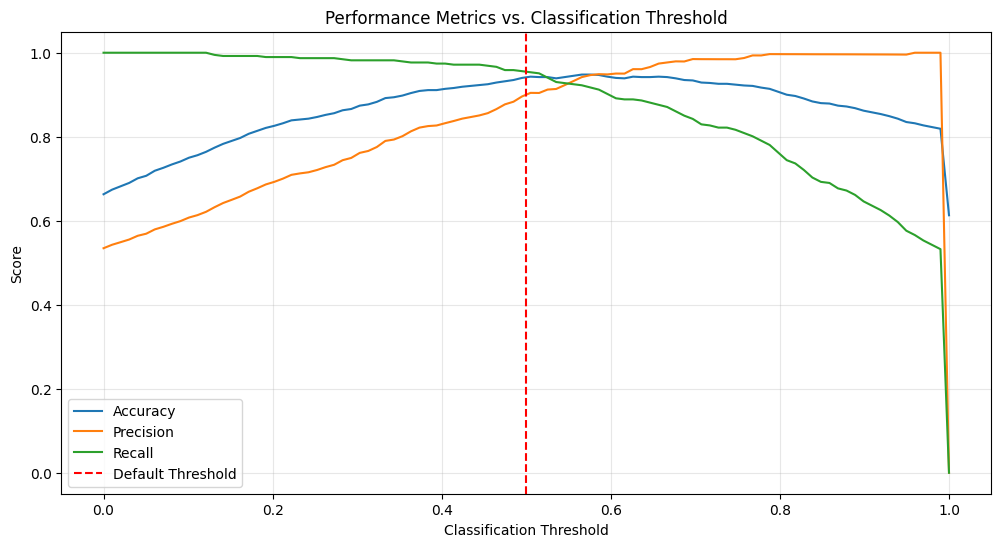


Key visualizations for model performance evaluation:
1. ROC Curve - Shows trade-off between true positive and false positive rates
2. Precision-Recall Curve - Especially useful for imbalanced datasets
3. Training History - Shows learning progress and potential overfitting
4. Confusion Matrix - Detailed breakdown of predictions
5. Prediction Distribution - Shows separation between classes
6. Calibration Plot - Shows reliability of predicted probabilities
7. Error Analysis - Shows patterns in prediction errors
8. Feature Importance - Shows which features contribute most
9. Learning Curve - Shows how model performs with more data
10. Threshold Analysis - Shows impact of classification threshold


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import auc, average_precision_score
import matplotlib.gridspec as gridspec

# Set style and random seed
#plt.style.use('seaborn-darkgrid')
np.random.seed(42)

# Generate sample model data
n_samples = 1000
# True probabilities and predictions
y_true = np.random.binomial(1, 0.4, n_samples)
y_pred_proba = np.clip(np.random.normal(y_true, 0.3), 0, 1)
y_pred = (y_pred_proba > 0.5).astype(int)

# Generate training history
history = pd.DataFrame({
    'epoch': range(1, 51),
    'train_loss': np.random.normal(0.5, 0.1, 50) - np.linspace(0.3, 0, 50),
    'val_loss': np.random.normal(0.6, 0.15, 50) - np.linspace(0.25, 0, 50),
    'train_acc': np.random.normal(0.8, 0.05, 50) + np.linspace(0, 0.15, 50),
    'val_acc': np.random.normal(0.75, 0.07, 50) + np.linspace(0, 0.12, 50)
})

# 1. ROC Curve
plt.figure(figsize=(10, 6))
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 2. Precision-Recall Curve
plt.figure(figsize=(10, 6))
precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
avg_precision = average_precision_score(y_true, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2,
         label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.show()

# 3. Training History Plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history['epoch'], history['train_loss'], label='Training Loss')
plt.plot(history['epoch'], history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history['epoch'], history['train_acc'], label='Training Accuracy')
plt.plot(history['epoch'], history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 5. Prediction Distribution
plt.figure(figsize=(12, 6))
plt.hist(y_pred_proba[y_true==0], bins=50, alpha=0.5, label='Actual Negative', density=True)
plt.hist(y_pred_proba[y_true==1], bins=50, alpha=0.5, label='Actual Positive', density=True)
plt.axvline(x=0.5, color='r', linestyle='--', label='Decision Threshold')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predictions by Class')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 6. Calibration Plot
plt.figure(figsize=(10, 6))
# Create calibration curve data
bins = np.linspace(0, 1, 11)
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_indices = np.digitize(y_pred_proba, bins) - 1
bin_means = np.array([y_true[bin_indices == i].mean() for i in range(len(bins)-1)])
bin_sizes = np.array([(bin_indices == i).sum() for i in range(len(bins)-1)])

plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfect Calibration')
plt.scatter(bin_centers, bin_means, s=bin_sizes*100/max(bin_sizes),
           alpha=0.7, label='Model Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Probability')
plt.title('Calibration Plot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 7. Error Analysis Over Time
plt.figure(figsize=(12, 6))
errors = np.abs(y_true - y_pred_proba)
plt.scatter(range(len(errors)), errors, alpha=0.5, c=y_true, cmap='coolwarm')
plt.axhline(y=errors.mean(), color='r', linestyle='--', label=f'Mean Error: {errors.mean():.3f}')
plt.xlabel('Sample Index')
plt.ylabel('Absolute Error')
plt.title('Error Analysis Over Samples')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 8. Feature Importance Plot (simulated)
plt.figure(figsize=(10, 6))
n_features = 10
feature_importance = np.random.uniform(0, 1, n_features)
feature_importance.sort()
feature_names = [f'Feature {i}' for i in range(n_features)]

plt.barh(range(n_features), feature_importance[::-1])
plt.yticks(range(n_features), feature_names[::-1])
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.grid(True, alpha=0.3)
plt.show()

# 9. Learning Curve
plt.figure(figsize=(10, 6))
training_sizes = np.linspace(0.1, 1.0, 10)
train_scores = 0.9 - np.exp(-3 * training_sizes) + np.random.normal(0, 0.02, 10)
val_scores = 0.85 - np.exp(-2.5 * training_sizes) + np.random.normal(0, 0.02, 10)

plt.plot(training_sizes * n_samples, train_scores, label='Training Score')
plt.plot(training_sizes * n_samples, val_scores, label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 10. Threshold Analysis
plt.figure(figsize=(12, 6))
thresholds = np.linspace(0, 1, 100)
accuracies = [np.mean((y_pred_proba > threshold) == y_true) for threshold in thresholds]
precisions = [np.mean(y_true[(y_pred_proba > threshold)]) if np.any(y_pred_proba > threshold) else 0
             for threshold in thresholds]
recalls = [np.mean((y_pred_proba > threshold)[y_true == 1]) for threshold in thresholds]

plt.plot(thresholds, accuracies, label='Accuracy')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.axvline(x=0.5, color='r', linestyle='--', label='Default Threshold')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Classification Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nKey visualizations for model performance evaluation:")
print("1. ROC Curve - Shows trade-off between true positive and false positive rates")
print("2. Precision-Recall Curve - Especially useful for imbalanced datasets")
print("3. Training History - Shows learning progress and potential overfitting")
print("4. Confusion Matrix - Detailed breakdown of predictions")
print("5. Prediction Distribution - Shows separation between classes")
print("6. Calibration Plot - Shows reliability of predicted probabilities")
print("7. Error Analysis - Shows patterns in prediction errors")
print("8. Feature Importance - Shows which features contribute most")
print("9. Learning Curve - Shows how model performs with more data")
print("10. Threshold Analysis - Shows impact of classification threshold")